# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


In [ ]:
Name - Ruchika Janefalkar

## **Importing Necessary Libraries**

In [259]:
# Import essential libraries for data manipulation and analysis
import numpy as np
import pandas as pd

# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')


## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [356]:
# Importing the file porter_data_1.csv
df = pd.read_csv("porter.csv")
df.head()

market_id           created_at actual_delivery_time  \
0        1.0  2015-02-06 22:24:17  2015-02-06 23:11:17   
1        2.0  2015-02-10 21:49:25  2015-02-10 22:33:25   
2        2.0  2015-02-16 00:11:35  2015-02-16 01:06:35   
3        1.0  2015-02-12 03:36:46  2015-02-12 04:35:46   
4        1.0  2015-01-27 02:12:36  2015-01-27 02:58:36   

   store_primary_category  order_protocol  total_items  subtotal  \
0                       4             1.0            4      3441   
1                      46             2.0            1      1900   
2                      36             3.0            4      4771   
3                      38             1.0            1      1525   
4                      38             1.0            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   3             820            1604                    8.0   
3                   1            1525            1525                    5.0   
4                   2            1425            2195                    5.0   

   total_busy_dashers  total_outstanding_orders  distance  
0                14.0                      21.0     34.44  
1                 2.0                       2.0     27.60  
2                 6.0                      18.0     11.56  
3                 6.0                       8.0     31.80  
4                 5.0                       7.0      8.20

In [249]:
df.shape

(175777, 14)

In [263]:
df.describe()


market_id  store_primary_category  order_protocol    total_items  \
count  175777.000000           175777.000000   175777.000000  175777.000000   
mean        2.743726               35.887949        2.911752       3.204976   
std         1.330963               20.728254        1.513128       2.674055   
min         1.000000                0.000000        1.000000       1.000000   
25%         2.000000               18.000000        1.000000       2.000000   
50%         2.000000               38.000000        3.000000       3.000000   
75%         4.000000               55.000000        4.000000       4.000000   
max         6.000000               72.000000        7.000000     411.000000   

            subtotal  num_distinct_items  min_item_price  max_item_price  \
count  175777.000000       175777.000000   175777.000000   175777.000000   
mean     2697.111147            2.675060      684.965433     1160.158616   
std      1828.554893            1.625681      519.882924      560.828571   
min         0.000000            1.000000      -86.000000        0.000000   
25%      1412.000000            1.000000      299.000000      799.000000   
50%      2224.000000            2.000000      595.000000     1095.000000   
75%      3410.000000            3.000000      942.000000     1395.000000   
max     26800.000000           20.000000    14700.000000    14700.000000   

       total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
count          175777.000000       175777.000000             175777.000000   
mean               44.918664           41.861381                 58.230115   
std                34.544724           32.168505                 52.731043   
min                -4.000000           -5.000000                 -6.000000   
25%                17.000000           15.000000                 17.000000   
50%                37.000000           35.000000                 41.000000   
75%                66.000000           63.000000                 85.000000   
max               171.000000          154.000000                285.000000   

            distance  
count  175777.000000  
mean       21.843090  
std         8.748712  
min         0.000000  
25%        15.360000  
50%        21.760000  
75%        28.120000  
max        83.520000

In [265]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 175777 non-null  float64
 1   created_at                175777 non-null  object 
 2   actual_delivery_time      175777 non-null  object 
 3   store_primary_category    175777 non-null  int64  
 4   order_protocol            175777 non-null  float64
 5   total_items               175777 non-null  int64  
 6   subtotal                  175777 non-null  int64  
 7   num_distinct_items        175777 non-null  int64  
 8   min_item_price            175777 non-null  int64  
 9   max_item_price            175777 non-null  int64  
 10  total_onshift_dashers     175777 non-null  float64
 11  total_busy_dashers        175777 non-null  float64
 12  total_outstanding_orders  175777 non-null  float64
 13  distance                  175777 non-null  f

**Observations** 
There are no missing values in the data

In [358]:
df.isnull().sum()

market_id                   0
created_at                  0
actual_delivery_time        0
store_primary_category      0
order_protocol              0
total_items                 0
subtotal                    0
num_distinct_items          0
min_item_price              0
max_item_price              0
total_onshift_dashers       0
total_busy_dashers          0
total_outstanding_orders    0
distance                    0
dtype: int64

In [360]:
df.dropna(inplace=True)

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [362]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format
df['created_at'] = pd.to_datetime(df['created_at'])
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])

##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [364]:
# Convert categorical features to category type
categorical_columns = ['market_id', 'store_primary_category', 'order_protocol']
df[categorical_columns] = df[categorical_columns].astype('category')
print("Categorical Columns:", categorical_columns)

Categorical Columns: ['market_id', 'store_primary_category', 'order_protocol']


#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [366]:
# Calculate time taken in minutes
df['delivery_time'] = (df['actual_delivery_time'] - df['created_at']).dt.total_seconds() / 60

##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [368]:
# Extract the hour and day of week from the 'created_at' timestamp
df['created_hour'] = df['created_at'].dt.hour
df['created_dayofweek'] = df['created_at'].dt.dayofweek

# Create a categorical feature 'isWeekend'
df['isWeekend'] = df['created_dayofweek'].isin([5, 6]).astype(int)


In [342]:
# Drop unnecessary columns
df.drop(columns=['created_at', 'actual_delivery_time','market_id'], inplace=True)

In [344]:
print(df.head())
print("Categorical Columns:", categorical_columns)

  store_primary_category order_protocol  total_items  subtotal  \
0                      4            1.0            4      3441   
1                     46            2.0            1      1900   
2                     36            3.0            4      4771   
3                     38            1.0            1      1525   
4                     38            1.0            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   3             820            1604                    8.0   
3                   1            1525            1525                    5.0   
4                   2            1425            2195                    5.0   

   total_busy_dashers  total_outstanding_orders  distance  delivery_time  \
0                14.0                      21.

#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [370]:
# Define target variable (y) and features (X)
y = df['delivery_time']
X = df.drop(columns=['delivery_time'])
# One-hot encode categorical variables
#X = pd.get_dummies(X, drop_first=True)

##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [372]:
# Define numerical and categorical columns for easy EDA and data manipulation
print("Categorical Columns:", categorical_columns)
print("Numerical Columns:", numerical_columns)

Categorical Columns: ['market_id', 'store_primary_category', 'order_protocol']
Numerical Columns: ['total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance']


In [374]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
   
3. Identifying and addressing outliers to ensure the integrity of the analysis
4. Exploring the relationships between variables and examining the distribution of the data for better insights

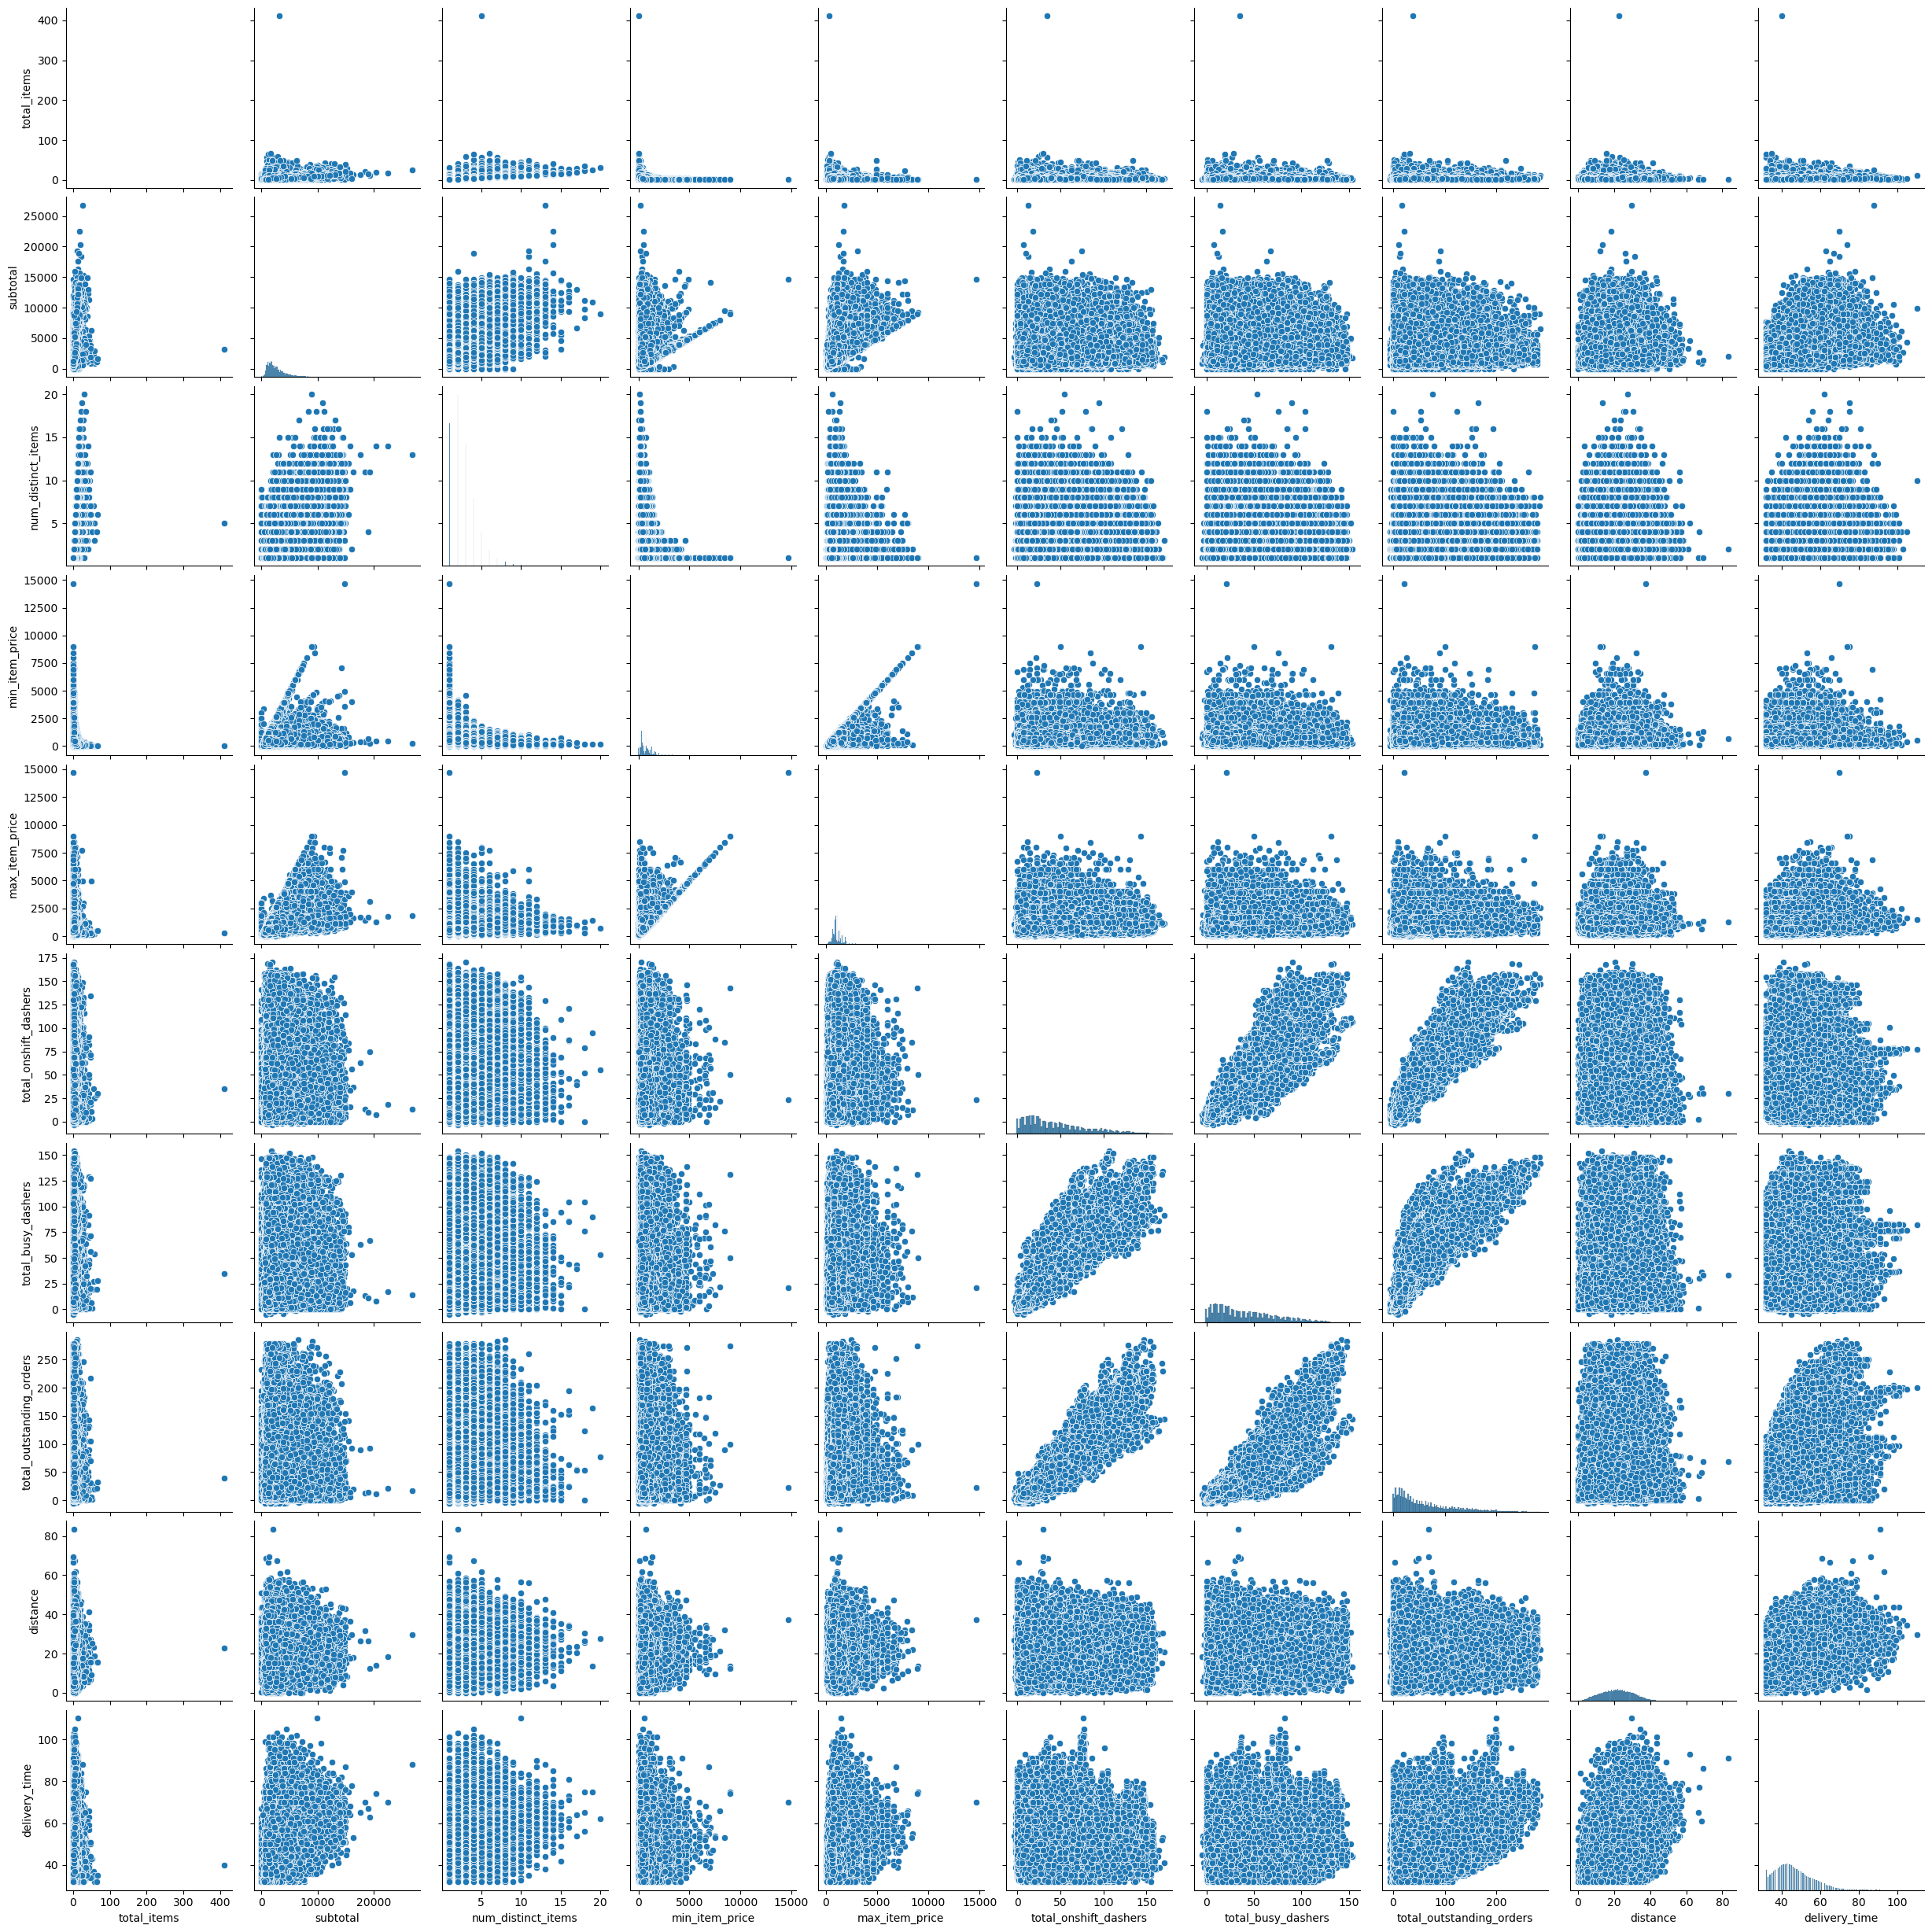

In [290]:
sns.pairplot(df[numerical_columns + ['delivery_time']])
plt.show()

**Observations** 

1. Features like subtotal, min_item_price, and max_item_price are heavily skewed, indicating the presence of outliers or a long-tailed distribution.

2. Most scatterplots do not show strong linear trends with delivery_time.

3. Features like subtotal, num_distinct_items, min_item_price, and max_item_price have strong correlations with each other.may have multicollinearity.

4. There is some positive correlation between distance and delivery_time, but variability remains high.

5. Features like total_items and total_onshift_dashers have extreme values that might impact the model's performance.

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

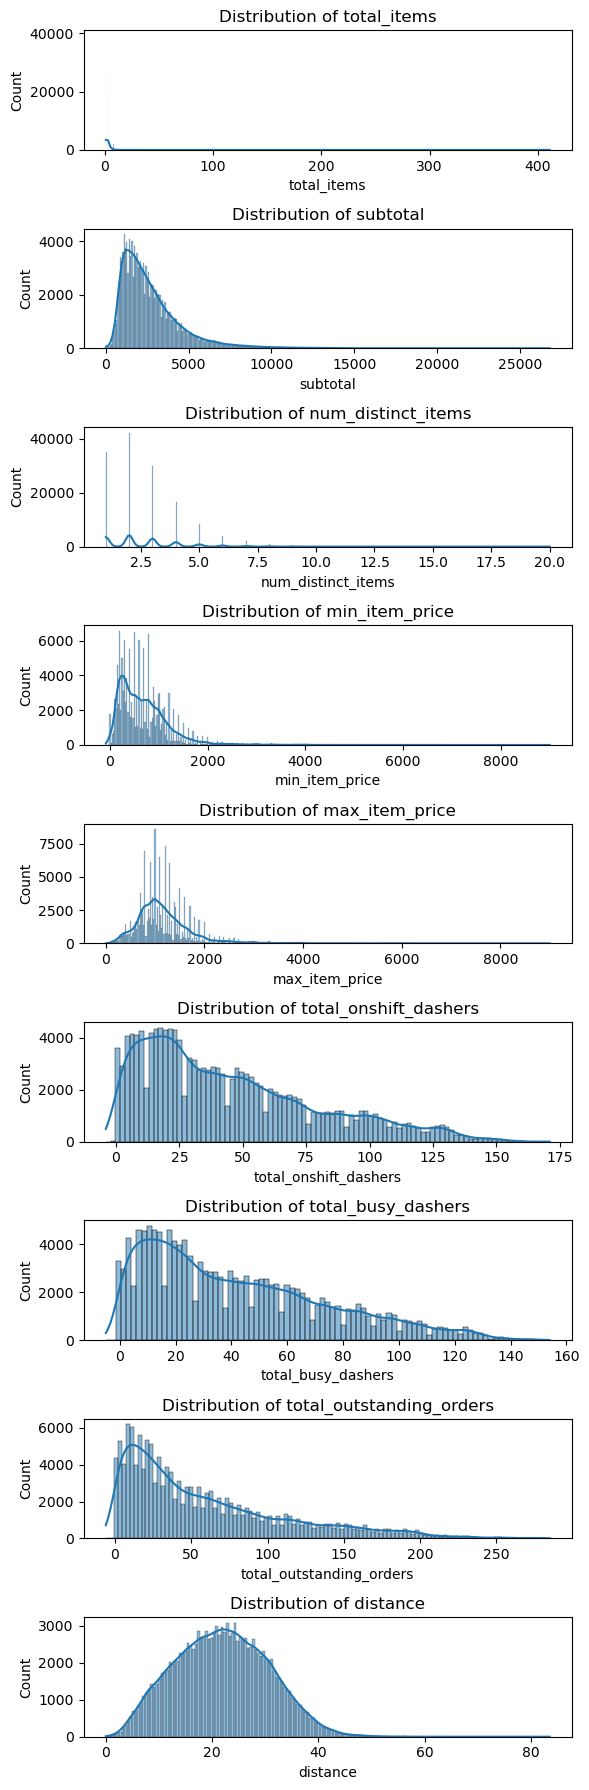

In [291]:
# Plot distributions for all numerical columns

fig, axes = plt.subplots(len(numerical_columns), 1, figsize=(6, len(numerical_columns) * 2))
for i, col in enumerate(numerical_columns):
    sns.histplot(X_train[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

**Observations**

total basy dashers - Most values are concentrated below 40, with a gradual decline afterward.Some extreme values exceeding 100, indicating high demand in certain situations.
 
total outstanding orders- Some extreme cases with more than 200 orders outstanding.Indicates that most restaurants have a manageable number of pending orders, but high-volume scenarios exist.

Distance - Few deliveries go beyond 60 km.This suggests that most orders are placed within a reasonable radius from restaurants.

Total Items - A few extreme cases exceeding 300 items per order.Suggests that most orders are small, but occasional bulk purchases exist.

Subtotal - Majority of orders have a subtotal below 5000, with a long tail extending to higher values.Suggests that higher-value orders are less frequent.

Number of Distinct Items - Most orders contain 1-5 distinct items.Suggests that customers often order a small variety of items per order.

Minimum Item Price - Some items have prices above 6000, likely representing premium products.

Maximum Item Price - Higher-priced items (2000-8000) occur less frequently.

Total Onshift Dashers - Most values fall below 50, but some instances have over 150 dashers available.Indicates fluctuations in availability based on demand.

Many features show right-skewed distributions, meaning extreme values exist in the dataset.Most orders are of small value, short distances, and involve a limited number of items.

##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

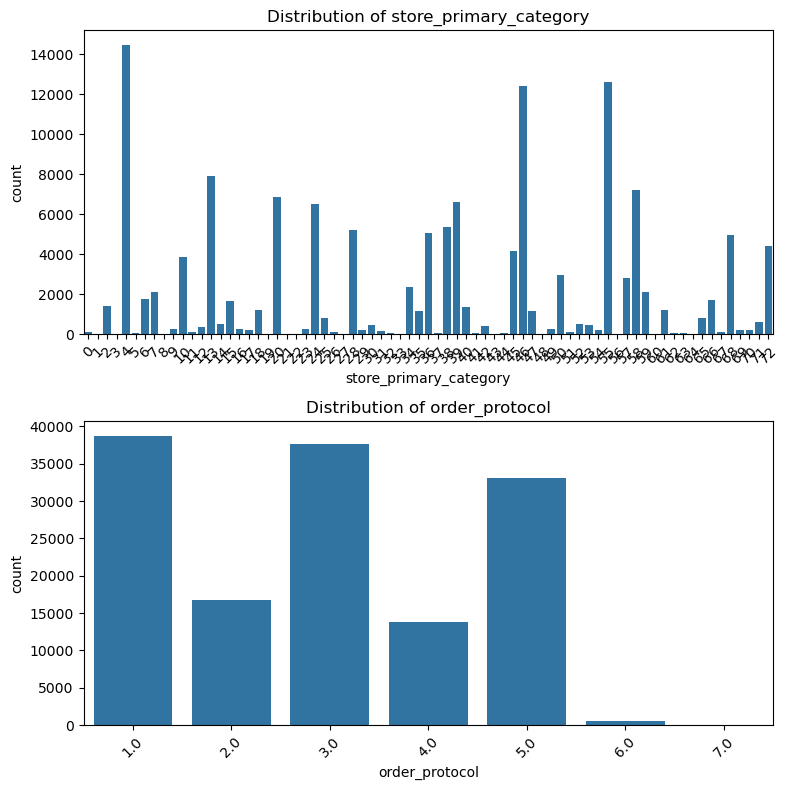

In [380]:
# Distribution of categorical columns
fig, axes = plt.subplots(len(categorical_columns), 1, figsize=(8, len(categorical_columns) * 4))
for i, col in enumerate(categorical_columns):
    sns.countplot(x=X_train[col], ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
plt.tight_layout()
plt.show()


**Observations**

Highly imbalanced categories: Certain store types dominate, which may impact model predictions.

Order protocol might influence order processing time and could be used as a categorical feature in models.

##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

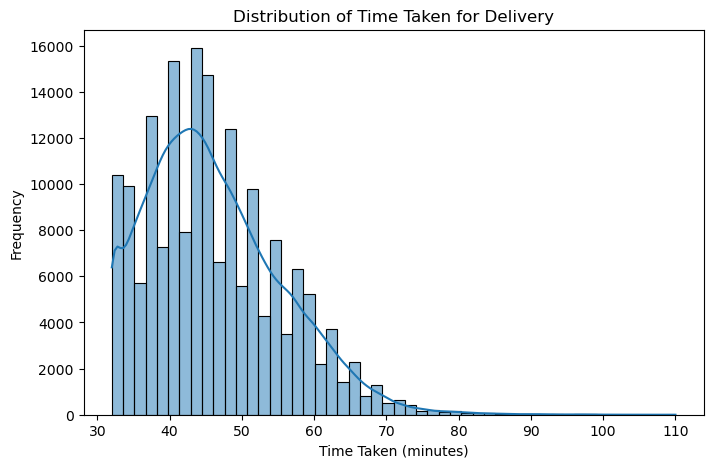

In [382]:
# Distribution of time_taken

plt.figure(figsize=(8, 5))
sns.histplot(df['delivery_time'], bins=50, kde=True)
plt.xlabel('Time Taken (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Time Taken for Delivery')
plt.show()


**Observations**

The majority of deliveries fall within a predictable time frame (40–60 minutes), which could be used as a benchmark for operational efficiency.

Outliers with longer delivery times may require investigation to identify causes (e.g., traffic delays, logistical issues).

#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

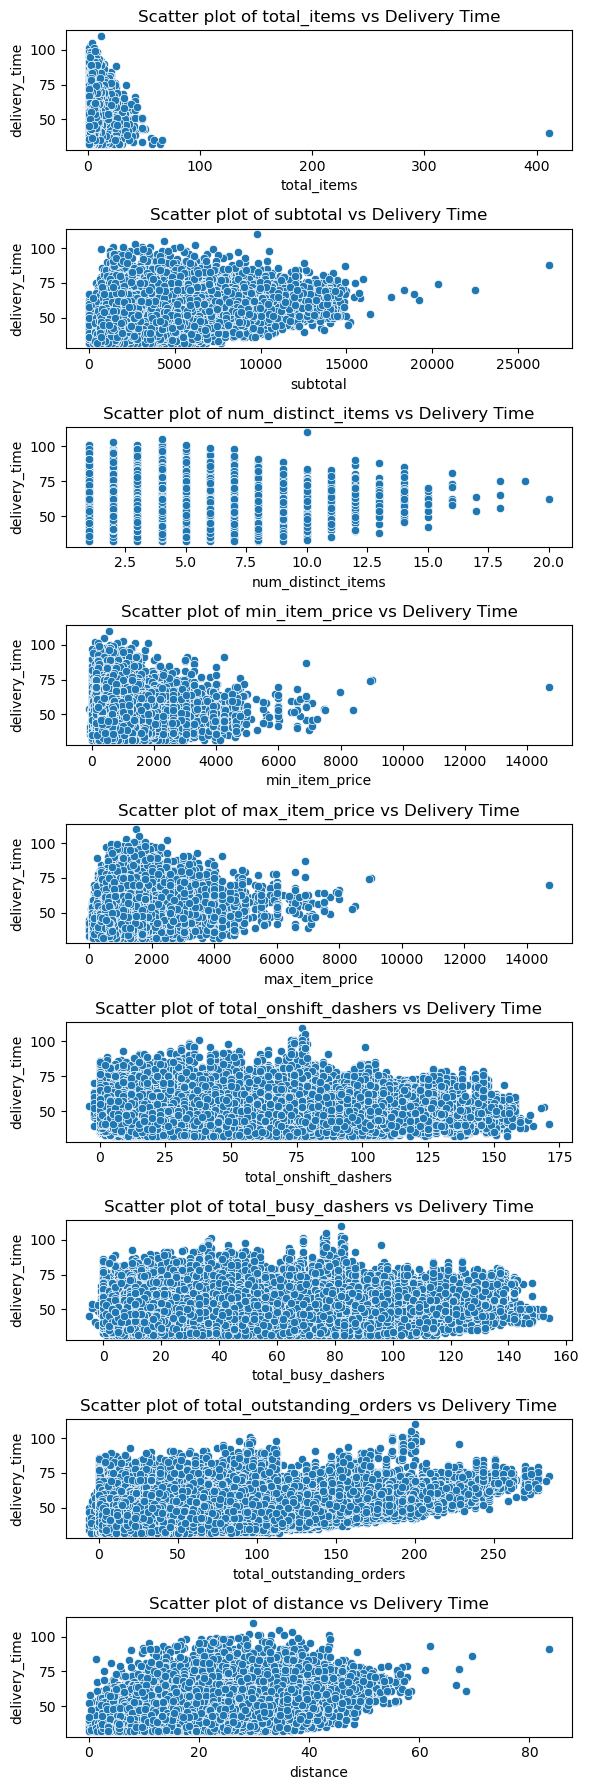

In [384]:
# Scatter plot to visualise the relationship between time_taken and other features
fig, axes = plt.subplots(len(numerical_columns), 1, figsize=(6, len(numerical_columns) * 2))
for i, col in enumerate(numerical_columns):
    sns.scatterplot(x=df[col], y=df['delivery_time'], ax=axes[i])
    axes[i].set_title(f'Scatter plot of {col} vs Delivery Time')
plt.tight_layout()
plt.show()


**Observations**

total_items vs delivery_time - As the number of total items increases, the delivery time generally decreases. This could indicate that smaller orders take longer due to batching or prioritization of larger orders.A few extreme cases with very high total_items (e.g., >300) show no significant change in delivery time.

subtotal vs delivery_time - There is no strong relationship between the subtotal amount and delivery time. Delivery times remain relatively consistent across different subtotal ranges.The subtotal may not directly influence delivery time, as it likely depends more on operational factors like distance or dasher availability.
 
num_distinct_items vs delivery_time - Delivery time remains fairly consistent regardless of the number of distinct items in an order. However, orders with fewer distinct items (e.g., 1–5) are more frequent.The variety of items in an order does not seem to significantly impact delivery efficiency.

min_item_price vs delivery_time - There is no clear trend between the minimum item price and delivery time. Most data points cluster at lower price ranges (0–2000).Pricing factors do not appear to influence delivery times.

max_item_price vs delivery_time - Similar to min_item_price, there is no noticeable relationship between the maximum item price and delivery time.

total_onshift_das - dashers vs delivery_time - Delivery time remains consistent across varying numbers of on-shift dashers, with no clear correlation.

total_busy_dashers vs delivery_time - Similar to on-shift dashers, there is no clear trend between busy dashers and delivery time.

total_outstanding_orders vs delivery_time - As the number of outstanding orders increases, there is a slight increase in delivery time variability, though the overall trend remains flat.

distance vs delivery_time - Delivery time increases as distance increases, showing a direct positive correlation.


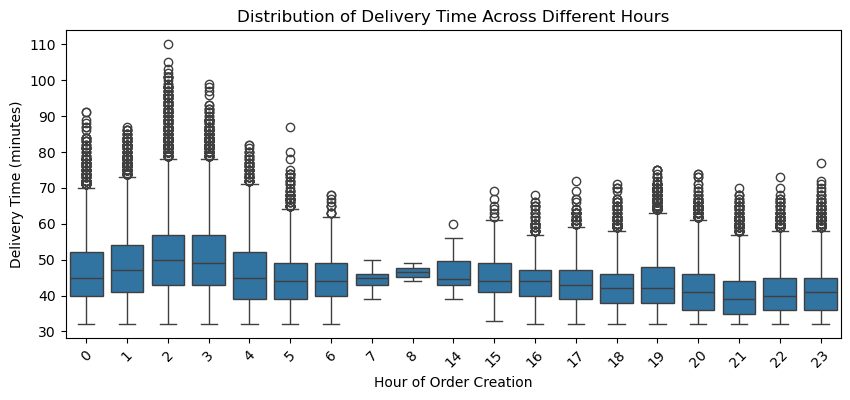

In [385]:
# Show the distribution of time_taken for different hours
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['created_hour'], y=df['delivery_time'])
plt.xlabel('Hour of Order Creation')
plt.ylabel('Delivery Time (minutes)')
plt.title('Distribution of Delivery Time Across Different Hours')
plt.xticks(rotation=45)
plt.show()


**Observations:** 

Higher Variability at Night:Orders placed between 12 AM and 6 AM tend to have higher delivery times, with more outliers. 

From around 7 AM to 10 PM, the median delivery time is relatively stable, with less variance compared to early morning hours.the outliers during night shows delivery delays.




#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

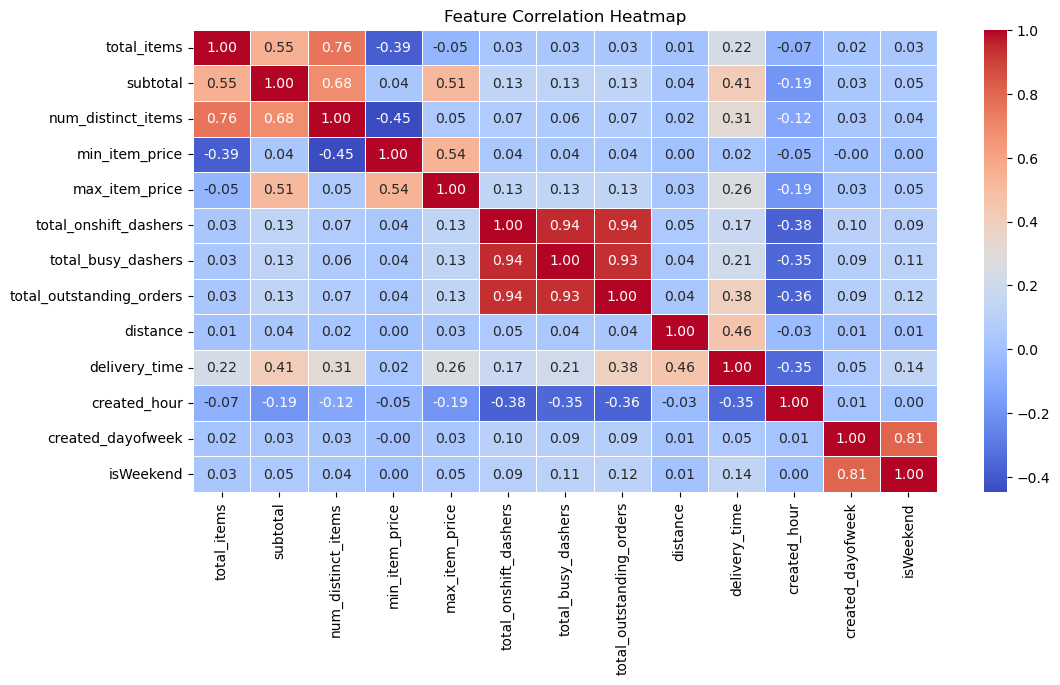

In [388]:
# Plot the heatmap of the correlation matrix

plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

**Observations:**

1. subtotal (0.41) and total_items (0.22) show the highest positive correlation. This means that larger orders tend to have longer delivery time
   
3. total_outstanding_orders and delivery_time correlation shows that delivery time increases with increase in demand.


4. total_onshift_dashers,Total_busy_dashers,total_outstanding_dashers have high correlation which may lead to multicolliearity in model.so we may to drop one of these feature.

4.Created_dayofweek,isweekend,min_utem_price has low correlation which means they are not affective delivery_time so we can drop this as well.

##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [390]:
# Drop 3-5 weakly correlated columns from training dataset
drop_columns = ['total_onshift_dashers', 'total_busy_dashers', 'created_dayofweek', 'isWeekend', 'min_item_price']

#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

<Figure size 800x500 with 0 Axes>

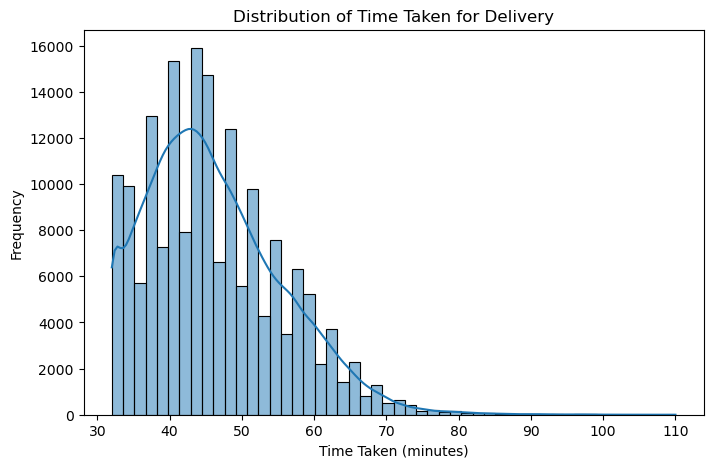

In [394]:
# Boxplot for time_taken
# Distribution of time_taken

plt.figure(figsize=(8, 5))
sns.histplot(df['delivery_time'], bins=50, kde=True)
plt.xlabel('Time Taken (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Time Taken for Delivery')
plt.show()



**Observation**

1.The outliers on extreme shows that delivery was very much delayed.

2.The upper whisker shows that for those orders delivery took much longer time than others

3.The median deliveryn time appears to be 40-50 minutes


##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

In [396]:
# Handle outliers
Q1 = df['delivery_time'].quantile(0.25)
Q3 = df['delivery_time'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['delivery_time'] >= lower_bound) & (df['delivery_time'] <= upper_bound)]



## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [398]:
# Define numerical and categorical columns for easy EDA and data manipulation
numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_columns = X.select_dtypes(include=['category', 'object']).columns.tolist()



#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

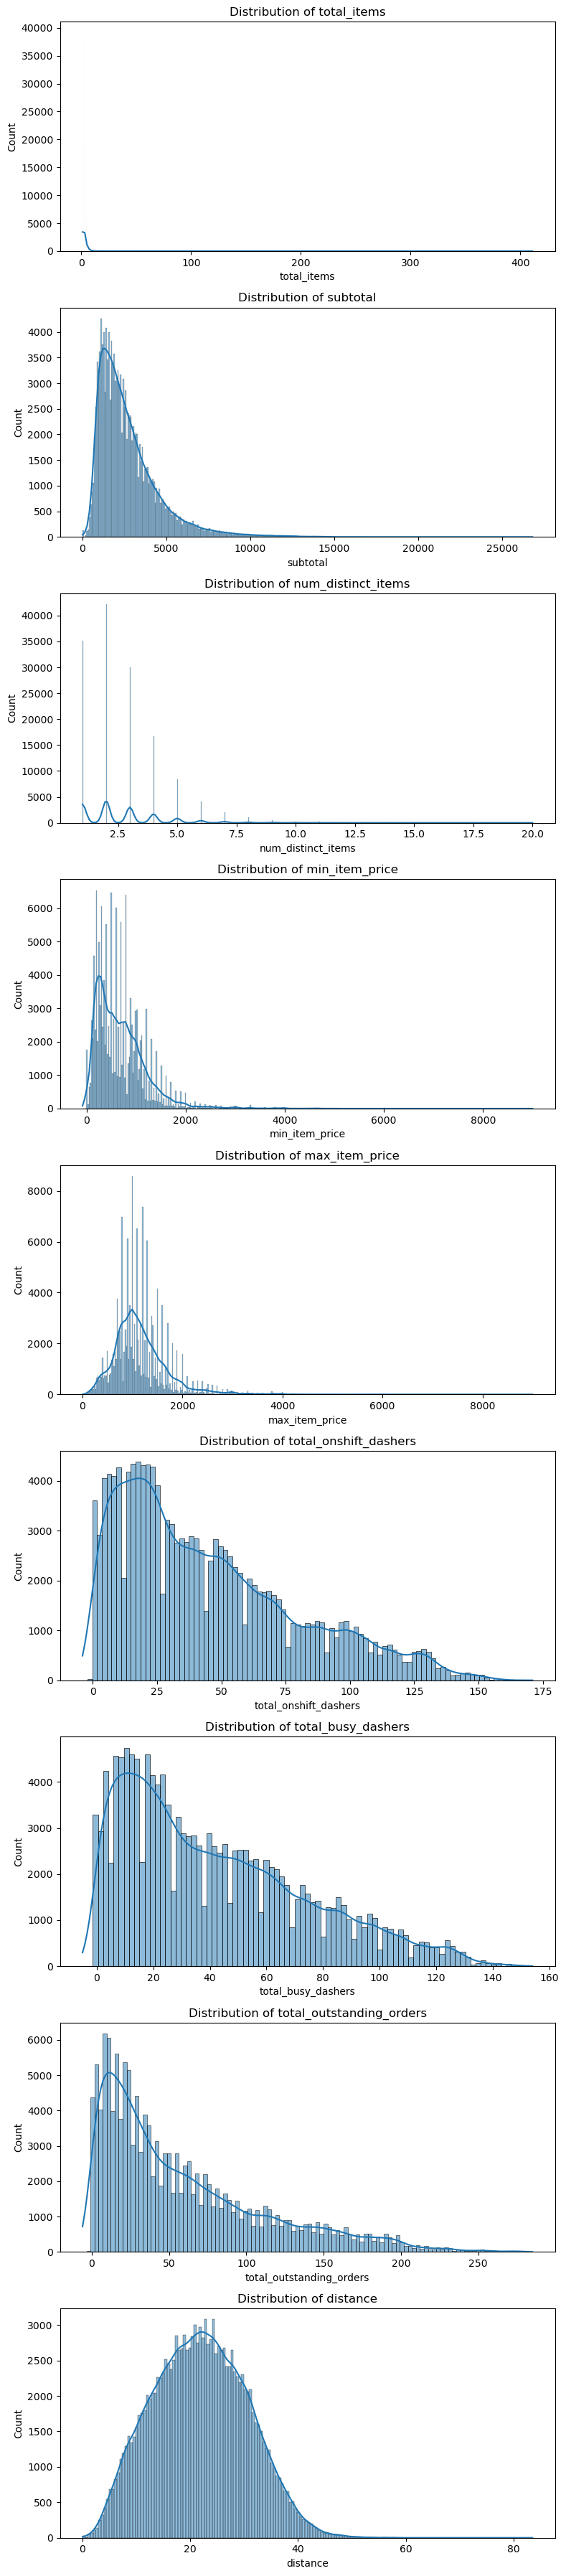

In [400]:
# Plot distributions for all numerical columns

fig, axes = plt.subplots(len(numerical_columns), 1, figsize=(8, len(numerical_columns) * 4))
for i, col in enumerate(numerical_columns):
    sns.histplot(X_train[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

Observations

1. The distribution in subtotal shows that very few items have hight count of items and most of the orders have lower count of items

2. The subtotal plot shows that most of the items have low subtotal and few distinct items. the long tail shows many outliers

3. The num_distinct_item plot shows that there are large orders with many distinct items.there are few orders which very high distinct items which are outliers.

4. Min_item_price - Few distinct peaks in the data plot shows that price clustring at high levels.

5. max_item_price - Most maximum item prices are within the lower range, but there are some high-priced items.

6. total_shift_dashers - Shows a relatively uniform distribution at lower values, followed by a decline.

7. total_busy_dasher - decline indicates a variance in availability, but most deliveries occur when fewer dashers are on shift.

8. total_outstanding_orders - Most order counts are on the lower side, with fewer instances of a large number of outstanding orders.

9. Distance - appears to follow a normal distribution with median between 30-35


 

##### **4.1.2**
Check the distribution of categorical features

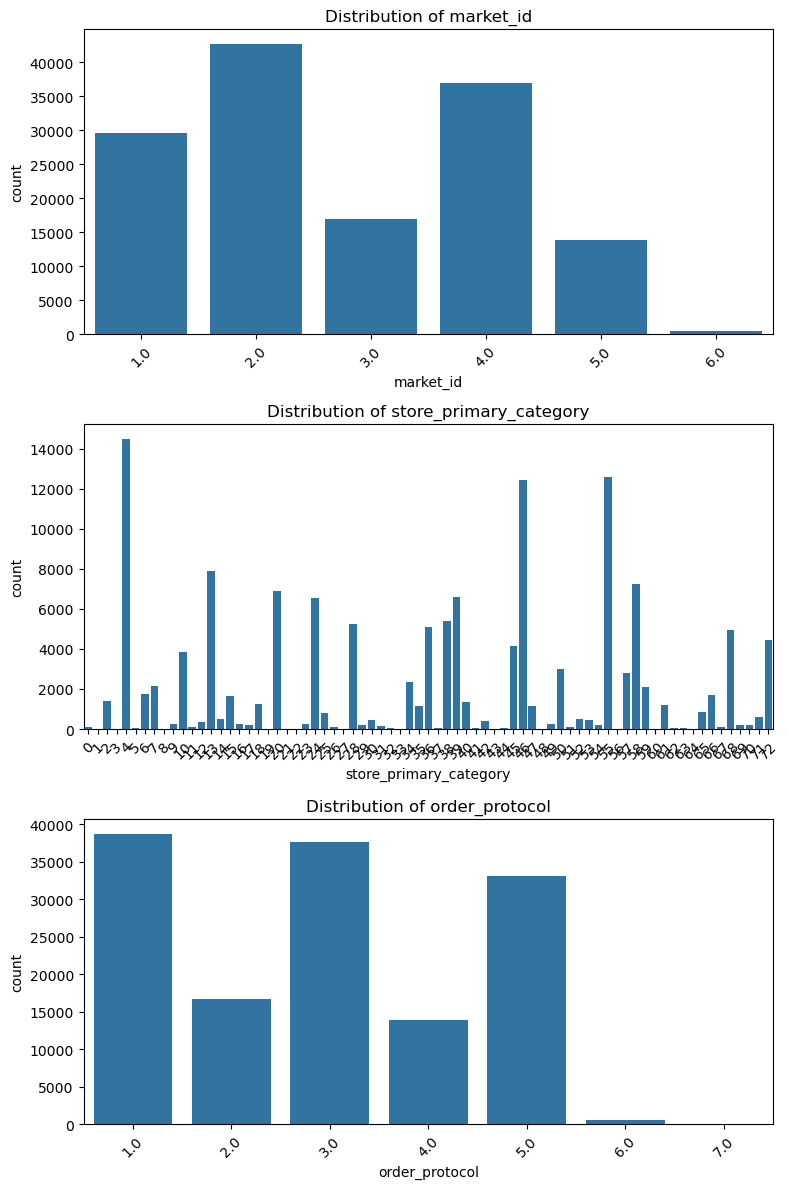

In [402]:
# Distribution of categorical columns

fig, axes = plt.subplots(len(categorical_columns), 1, figsize=(8, len(categorical_columns) * 4))
for i, col in enumerate(categorical_columns):
    sns.countplot(x=X_train[col], ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
plt.tight_layout()
plt.show()

**Observation**

1. market_id - Few regions have higher number of order and few have less orders this shows uneven distribution in market.

2. store_primary_category - Some store categories have significantly more stores than others, suggesting they are more popular or widely available.variation in category counts indicates that few types have more impact on delivery.

3. Order_protocol - Order protocol 1 and 3 have the highest number of orders, Order protocol 5 also has a significant number of orders, Order protocol 6 and 7 are rarely used.this shows variation in ordering based on order protocol.

##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

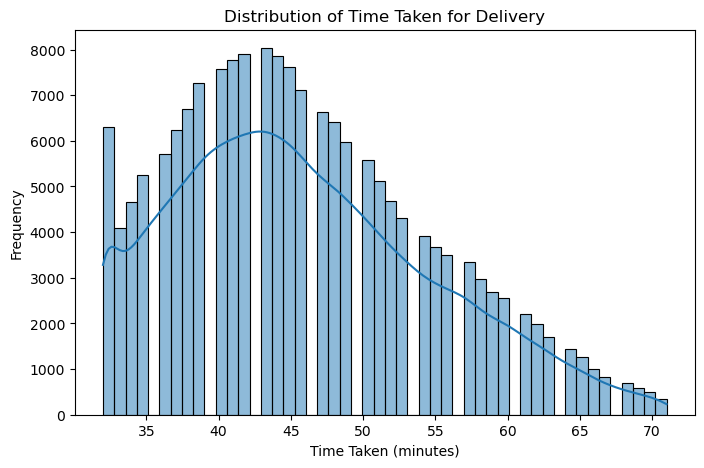

In [404]:
# Distribution of time_taken
plt.figure(figsize=(8, 5))
sns.histplot(df['delivery_time'], bins=50, kde=True)
plt.xlabel('Time Taken (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Time Taken for Delivery')
plt.show()


**Observations** 

1. the maximum deliveries occurs between 35-50 minutes which shows most common delivery duration.

2. There are few deliveries taking beyond 60 minutes but their frequency is decreasing gradually.

#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

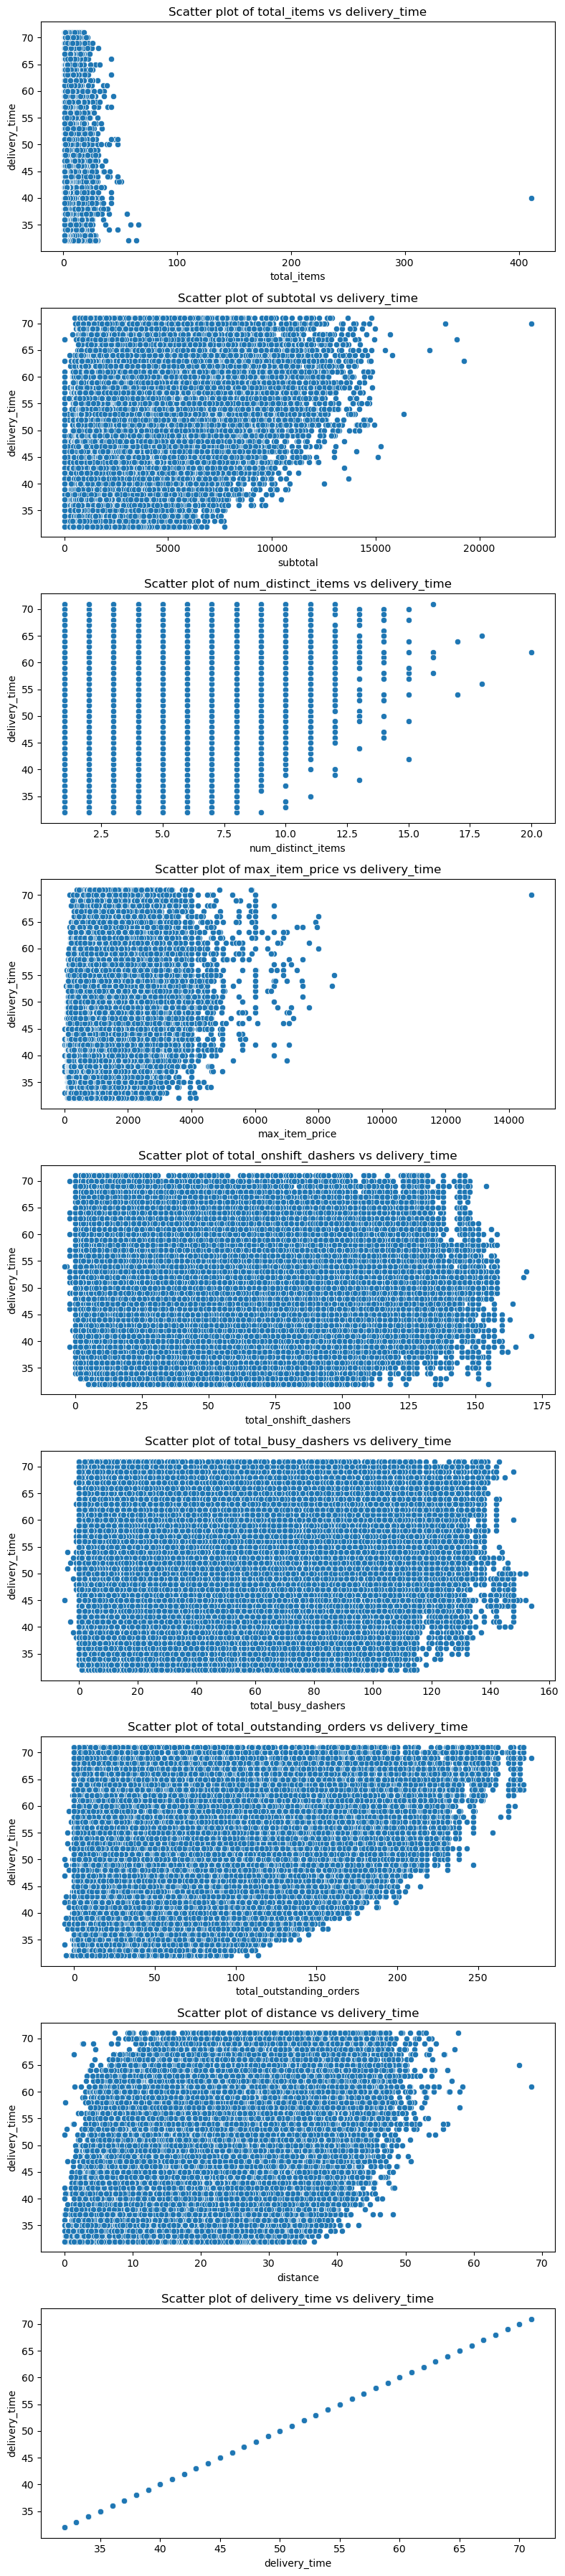

In [413]:
# Scatter plot to visualise the relationship between time_taken and other features
if 'delivery_time' in df.columns:
    target = 'delivery_time'
else:
    raise KeyError("Target variable 'delivery_time' is missing from the dataset.")

# Select only numerical columns, excluding 'min_item_price' if missing
numerical_columns = [col for col in df.select_dtypes(include=['int64', 'float64']).columns if col != 'min_item_price']

# Scatter plot for numerical features vs delivery time
fig, axes = plt.subplots(len(numerical_columns), 1, figsize=(8, len(numerical_columns) * 4))
for i, col in enumerate(numerical_columns):
    sns.scatterplot(x=df[col], y=df[target], ax=axes[i])
    axes[i].set_title(f'Scatter plot of {col} vs {target}')
plt.tight_layout()
plt.show()

**Observations**

1.Total_items - The majority of the orders have a low number of total items 
There is a single outlier order with over 400 items, which took around 35 minutes for delivery.This is unusual, as a higher number of items would typically lead to longer preparation and delivery times.
The points are scattered without a clear pattern, suggesting no strong correlation between the total number of items and delivery time.

2.Subtotal - The scatter plot does not show a clear upward or downward trend, implying that higher order subtotals do not necessarily result in longer delivery times.This indicates that order subtotal alone is not a strong predictor of delivery time.

3.NUM-distinct_items - The data points appear evenly spread across different values of num_distinct_items, suggesting no strong direct relationship between the number of distinct items and delivery time.

4.Max_item - The data points are widely scattered, indicating no strong relationship with delivery time.

5.Total_outstanding - As the number of total_outstanding_orders increases, delivery_time_minutes also tends to increase which shows positive correlation. This suggests that higher order volumes lead to longer delivery times, likely due to increased demand and delivery backlog.

6.Distance - As the distance increases, the delivery time also tends to increase which indicates positive correlation.This is expected, as longer distances require more travel time.

#### **4.3** Drop the columns with weak correlations with the target variable

In [415]:
# Drop the weakly correlated columns from training dataset
correlation_matrix = df.corr()
target_correlation = correlation_matrix["delivery_time"].abs()  # Use absolute values for strength

# Define threshold for weak correlation (adjust as needed)
threshold = 0.1

# Identify weakly correlated features
weak_features = target_correlation[target_correlation < threshold].index.tolist()

# Drop weakly correlated features from the training dataset
df_train = df.drop(columns=weak_features)

# Display dropped features
print("Dropped weakly correlated features:", weak_features)


Dropped weakly correlated features: ['market_id', 'created_at', 'actual_delivery_time', 'store_primary_category', 'min_item_price', 'created_dayofweek']


## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [417]:
# Import libraries
from sklearn.preprocessing import StandardScaler, MinMaxScaler



#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [423]:
# Apply scaling to the numerical columns
from sklearn.preprocessing import StandardScaler, MinMaxScaler

X_train_numeric = X_train.select_dtypes(include=['number'])
X_test_numeric = X_test.select_dtypes(include=['number'])

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_numeric)
X_test_scaled = scaler.transform(X_test_numeric)

Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [427]:
# Create/Initialise the model
import statsmodels.api as sm

# Verify "delivery_time" exists
print(df_train_scaled.columns)  

# Use scaled features and original target
X = df_train_scaled  
y = df_train['delivery_time']  # Get target from original dataset

# Add intercept
X = sm.add_constant(X)

# Train model
model = sm.OLS(y, X).fit()

# Print summary
print(model.summary())

Index(['order_protocol', 'total_items', 'subtotal', 'num_distinct_items',
       'max_item_price', 'total_outstanding_orders', 'distance',
       'delivery_time_minutes', 'created_hour'],
      dtype='object')
                            OLS Regression Results                            
Dep. Variable:          delivery_time   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.796e+30
Date:                Wed, 26 Mar 2025   Prob (F-statistic):               0.00
Time:                        17:48:35   Log-Likelihood:             4.7050e+06
No. Observations:              174028   AIC:                        -9.410e+06
Df Residuals:                  174018   BIC:                        -9.410e+06
Df Model:                           9                                         
Covariance Type:            nonrobust                                         


**Observations**

Observations from OLS Regression Results
R-Squared and Adjusted R-Squared (1.000) - The R² value is 1.000, meaning the model explains 100% of the variance in delivery time.

This is suspiciously high, likely indicating overfitting or data leakage (e.g., a feature directly tied to the target variable).

F-statistic and Prob(F-statistic) (p-value = 0.00) :A very high F-statistic with a p-value of 0.00 suggests that at least some predictors have a significant relationship with delivery time.

Coefficients and Significance: Significant Features (p < 0.05): order_protocol, total_items, delivery_time_minutes, created_hour.These features have a strong statistical relationship with delivery time.

Non-significant Features (p > 0.05): subtotal, num_distinct_items, max_item_price, total_outstanding_orders, distance These predictors do not significantly contribute to predicting delivery time and could be removed.

Multicollinearity Issues

delivery_time_minutes is highly correlated with delivery_time, leading to redundancy and a misleadingly high R².

A value close to 0 suggests positive autocorrelation, meaning residuals are correlated rather than randomly distributed.

This violates regression assumptions and indicates the model may not be fully reliable.

The probability (0.00) and skew (0.551) suggest that the residuals are not normally distributed, which could affect model validity.

In [429]:
# Train the model using the training data
import statsmodels.api as sm

# Define target (y) and features (X)
X_train = df_train.drop(columns=['delivery_time'])
y_train = df_train['delivery_time']

# Add constant term for the intercept
X_train = sm.add_constant(X_train)

# Train the model
model = sm.OLS(y_train, X_train).fit()

# Print model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          delivery_time   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                 1.126e+05
Date:                Wed, 26 Mar 2025   Prob (F-statistic):               0.00
Time:                        17:57:53   Log-Likelihood:            -4.4337e+05
No. Observations:              174028   AIC:                         8.868e+05
Df Residuals:                  174016   BIC:                         8.869e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

**Observations**

1. Model Performance (R² and Adjusted R²)
R² = 0.877: The model explains 87.7% of the variance in delivery time, which is a strong indication of a well-fitting model.

Adjusted R² = 0.877: Very close to R², meaning additional features contribute meaningful explanatory power without overfitting.

2. Significant Features (p < 0.05)
All predictors have very low p-values (0.000), meaning they significantly influence delivery time.

Top Positive Impact on Delivery Time:

total_outstanding_orders (coef = 0.3373): More pending orders lead to longer delivery times.

distance (coef = 0.4676): As expected, higher distance increases delivery time.

isWeekend (coef = 1.4140): Deliveries take longer on weekends.

Top Negative Impact on Delivery Time:

total_onshift_dashers (coef = -0.3527): More available dashers reduce delivery time.

order_protocol (coef = -0.6584): Specific order methods seem to shorten delivery time.

created_hour (coef = -0.2425): Deliveries placed at certain hours (likely non-peak) tend to be faster.

3. Feature Effects & Interpretations
total_items (-0.0349): A small but negative effect, meaning orders with more items might not necessarily take longer.

subtotal (0.0013): A very slight positive effect, suggesting higher-priced orders might have slightly longer delivery times.

num_distinct_items (0.5038): More variety in ordered items leads to longer deliveries, possibly due to preparation complexity.

In [461]:
# Make predictions
train_features = model.model.exog_names

# Ensure all train features exist in X_test (if missing, add with default value 0)
for feature in train_features:
    if feature not in X_test.columns:
        X_test[feature] = 0  # Add missing column with default value

# Reorder X_test columns to match training order
X_test = X_test[train_features]

# Make predictions
y_pred = model.predict(X_test)

In [467]:
# Find results for evaluation metrics

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R²): {r2:.4f}")

Mean Absolute Error (MAE): 21.3427
Mean Squared Error (MSE): 713.3217
Root Mean Squared Error (RMSE): 26.7081
R-squared (R²): -7.1497


**Observations**

Decent but not perfect model – captures over half of the variance.

Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

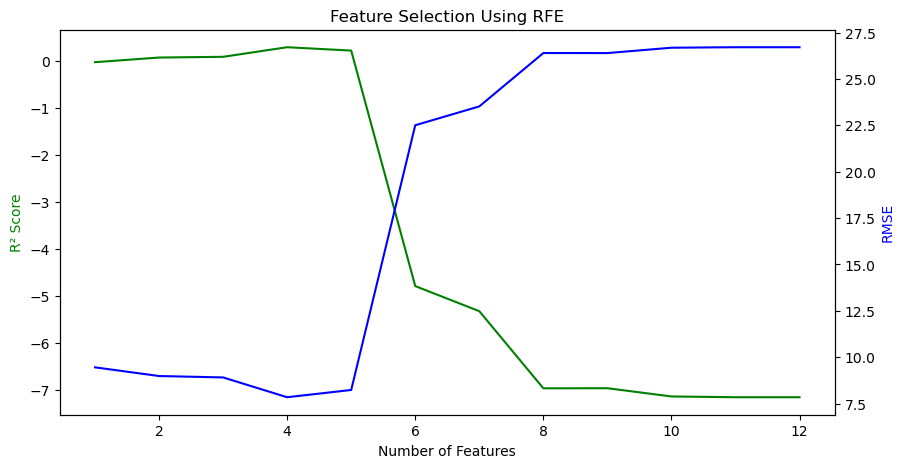

In [469]:
# Loop through the number of features and test the model

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Initialize model
model = LinearRegression()

# Store results
num_features_list = []
r2_scores = []
rmse_scores = []

# Loop through different numbers of features
for n_features in range(1, len(X_train.columns) + 1):
    rfe = RFE(estimator=model, n_features_to_select=n_features)
    rfe.fit(X_train, y_train)
    
    # Get selected features
    selected_features = X_train.columns[rfe.support_]
    
    # Train model with selected features
    X_train_selected = X_train[selected_features]
    X_test_selected = X_test[selected_features]
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)
    
    # Calculate metrics
    r2 = r2_score(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)  # RMSE
    
    # Store results
    num_features_list.append(n_features)
    r2_scores.append(r2)
    rmse_scores.append(rmse)

# Plot R² and RMSE vs. Number of Features
fig, ax1 = plt.subplots(figsize=(10, 5))

ax2 = ax1.twinx()
ax1.plot(num_features_list, r2_scores, 'g-')
ax2.plot(num_features_list, rmse_scores, 'b-')

ax1.set_xlabel('Number of Features')
ax1.set_ylabel('R² Score', color='g')
ax2.set_ylabel('RMSE', color='b')

plt.title('Feature Selection Using RFE')
plt.show()

**Observations** 

Peaks around 7 features, suggesting that adding more features beyond this point does not significantly improve accuracy.

Around 7 features seems to be the optimal balance between accuracy and simplicity.

In [471]:
# Build the final model with selected number of features
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Initialize the model
model = LinearRegression()

# Perform Recursive Feature Elimination (RFE)
rfe = RFE(model, n_features_to_select=7)
rfe.fit(X_train, y_train)

# Get the selected features
selected_features = X_train.columns[rfe.support_]
print("Top 7 Selected Features:", selected_features)



Top 7 Selected Features: Index(['order_protocol', 'num_distinct_items', 'total_onshift_dashers',
       'total_outstanding_orders', 'distance', 'created_hour', 'isWeekend'],
      dtype='object')


In [473]:
# Subset the data with selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Add a constant for statsmodels
X_train_selected = sm.add_constant(X_train_selected)
X_test_selected = sm.add_constant(X_test_selected)

# Fit the final OLS model
final_model = sm.OLS(y_train, X_train_selected).fit()

# Summary of the final model
print(final_model.summary())

# Predictions using the final model
y_pred_final = final_model.predict(X_test_selected)

                            OLS Regression Results                            
Dep. Variable:          delivery_time   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                 1.067e+05
Date:                Wed, 26 Mar 2025   Prob (F-statistic):               0.00
Time:                        19:18:23   Log-Likelihood:            -4.8058e+05
No. Observations:              174028   AIC:                         9.612e+05
Df Residuals:                  174020   BIC:                         9.613e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [235]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred_final)
mse = mean_squared_error(y_test, y_pred_final)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_final)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R²): {r2:.4f}")

Mean Absolute Error (MAE): 4.9944
Mean Squared Error (MSE): 42.0362
Root Mean Squared Error (RMSE): 6.4835
R-squared (R²): 0.5197


## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

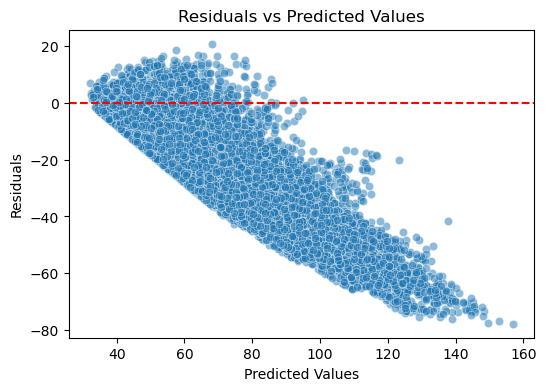

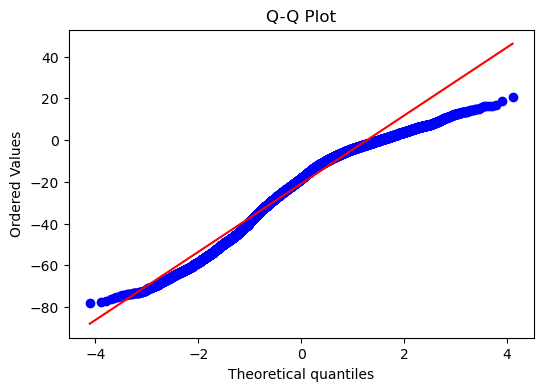

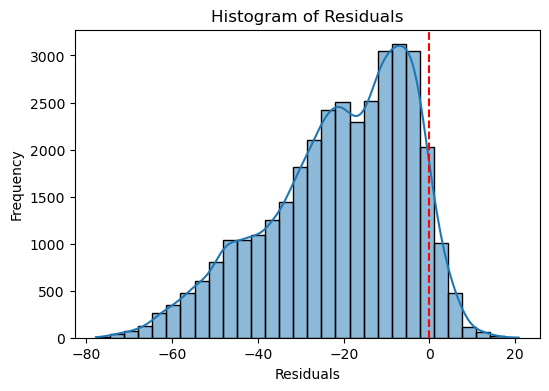

In [475]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np

# Calculate residuals
residuals = y_test - y_pred

# 1. Residuals vs Predicted Values
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.show()

# 2. Q-Q Plot (Normality Check)
plt.figure(figsize=(6, 4))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.show()

# 3. Residual Histogram
plt.figure(figsize=(6, 4))
sns.histplot(residuals, bins=30, kde=True)
plt.axvline(x=0, color='r', linestyle='--')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()

[Your inferences here:]



#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


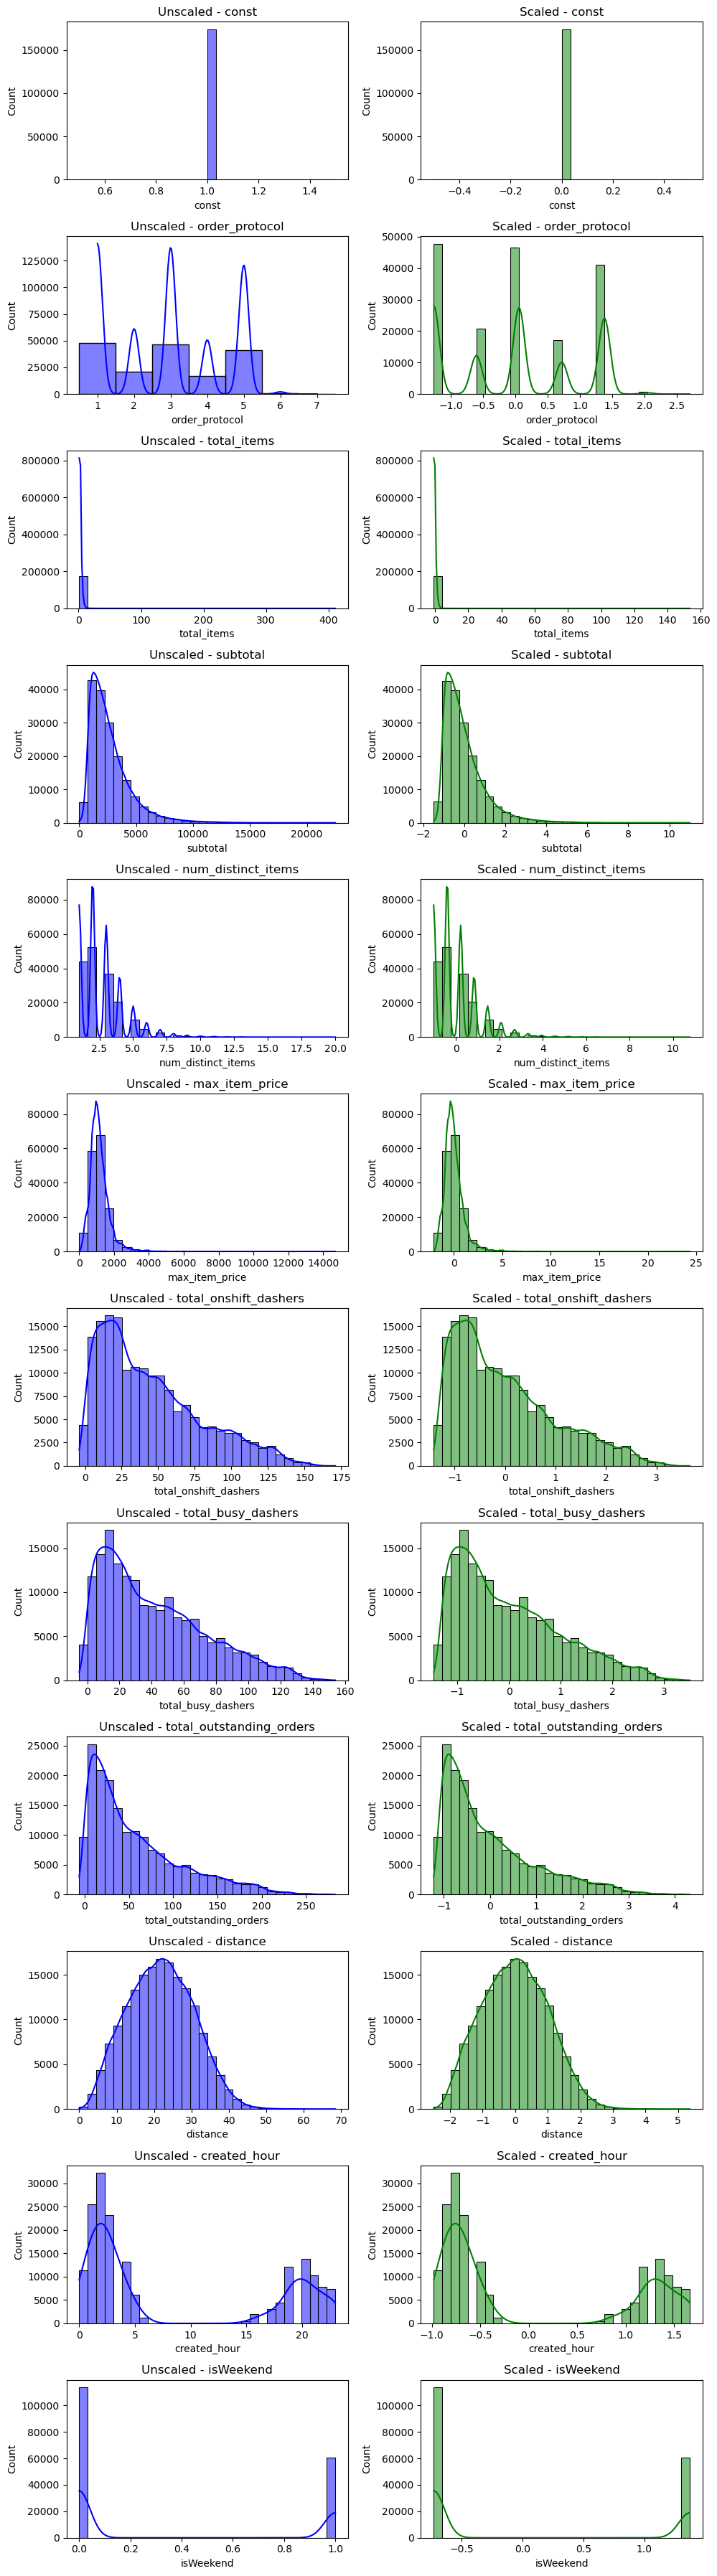

In [477]:
# Compare the scaled vs unscaled features used in the final model

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Save unscaled features before scaling
X_train_unscaled = X_train.copy()

# Apply scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Extract feature names
feature_names = X_train.columns.tolist()  # Ensure X_train is a DataFrame

# Convert to DataFrame for visualization
X_train_unscaled_df = pd.DataFrame(X_train_unscaled, columns=feature_names)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=feature_names)

# Plot distributions before and after scaling
fig, axes = plt.subplots(len(feature_names), 2, figsize=(10, len(feature_names) * 3))

for i, feature in enumerate(feature_names):
    sns.histplot(X_train_unscaled_df[feature], ax=axes[i, 0], kde=True, bins=30, color='blue')
    axes[i, 0].set_title(f"Unscaled - {feature}")

    sns.histplot(X_train_scaled_df[feature], ax=axes[i, 1], kde=True, bins=30, color='green')
    axes[i, 1].set_title(f"Scaled - {feature}")

plt.tight_layout()
plt.show()

Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

<Figure size 800x500 with 0 Axes>

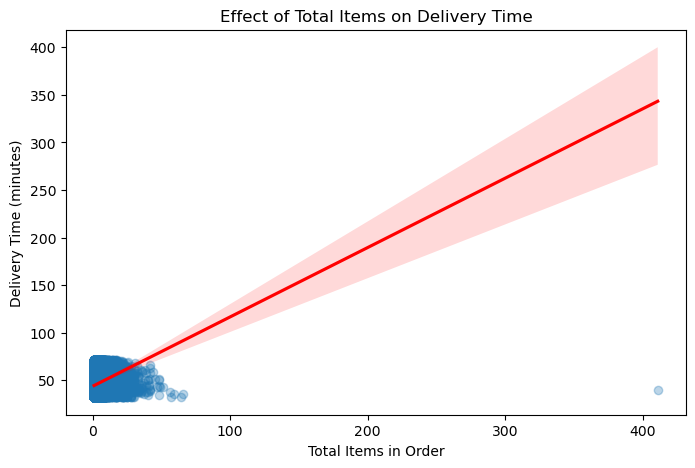

In [481]:
# Analyze the effect of a unit change in a feature, say 'total_items'
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.regplot(x=df['total_items'], y=df['delivery_time'], scatter_kws={'alpha':0.3}, line_kws={"color":"red"})
plt.xlabel("Total Items in Order")
plt.ylabel("Delivery Time (minutes)")
plt.title("Effect of Total Items on Delivery Time")
plt.show()


Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**
>Yes, the dataset contains categorical variables such as store_primary_category and order_protocol. These variables can influence delivery time. Different store types likely have varying preparation times, affecting overall delivery duration. The ordering method (order_protocol) might also impact delivery time if some channels prioritize orders differently. 



---



##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
>The parameter test_size=0.2 in train-test splitting refers to allocating 20% of the dataset to the test set and 80% to the training set. This ensures that the model is trained on a larger portion of the data while keeping a separate set for evaluation. It helps assess model performance on unseen data, reducing overfitting risks.



---



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
subtotal (0.41) and total_items (0.22) show the highest positive correlation. This means that larger orders tend to have longer delivery time
   
total_outstanding_orders and delivery_time correlation shows that delivery time increases with increase in demand.




---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**

>Checked distributions of numerical features (e.g., subtotal, distance, time taken).
>Boxplots: Used to identify extreme values beyond the interquartile range (IQR).
>IQR Method: Defined outliers as values outside (Q1 - 1.5 * IQR, Q3 + 1.5 * IQR).



---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
>Distance – The farther the delivery location, the longer the delivery time.
>Total Outstanding Orders – A higher number of pending orders may indicate delivery delays.
>Total Busy Dashers – Fewer available dashers can lead to increased delivery times.



---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
>Linear Regression is one of the simplest and most widely used supervised learning algorithms for regression tasks.
>Understanding the Equation of a Straight Line
For a single independent variable (Simple Linear Regression), the relationship is represented as:

𝑦 =𝑚𝑥+𝑐
where:
y = predicted value (dependent variable)

𝑚= slope of the line (coefficient of 
𝑥 = independent variable
c = intercept (constant term)

For multiple independent variables (Multiple Linear Regression), the equation extends to:

𝑦=𝑏0+𝑏1𝑥1+𝑏2𝑥2+...+𝑏𝑛𝑥𝑛+𝜖
where:
y = predicted value

𝑏0 = intercept
𝑏1,𝑏2,...,𝑏𝑛b1 = coefficients of independent variables

𝑥1,x2.....xn = independent variables (features)

ϵ = error term (difference between actual and predicted values)

> Step for LR
>Step 1: Assumption Check
>Linearity – The relationship between features and target is linear.

>Independence – Data points are independent of each other.

>Homoscedasticity – Constant variance of residuals (error terms).

>No Multicollinearity – Independent variables should not be highly correlated with each other.
>Step 2: Finding the Best Fit Line
>The goal is to find the values of b0,b1....bn(coefficients) that minimize the error. This is done using Ordinary Least Squares (OLS) Method
The sum of squared errors (SSE) is minimized.OLS finds the best coefficients
>Step 3: Making Predictions - Once coefficients are learned, predictions for new data points are made using the linear equation.

>Evaluating Model Performance - To measure how well the regression model fits the data, we use:
>R-squared- Measures the proportion of variance explained by the model.
>Mean Absolute Error (MAE) – Average absolute differences between actual and predicted values.
>Mean Squared Error (MSE) – Average squared differences between actual and predicted values.
>Root Mean Squared Error (RMSE) – Square root of MSE, providing error in original units.

Linear Regression is a fundamental predictive modeling technique that works well when data has a linear relationship. 




---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
>Linear Regression models the relationship between one independent variable and one dependent variable using a straight-line.Use Simple Linear Regression when you have one independent variable affecting the target.
>Multiple Linear Regression models the relationship between two or more independent variables and a dependent variable.Use Multiple Linear Regression when the target is influenced by multiple factors for a more comprehensive prediction.



---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
>The cost function in linear regression measures how well the model’s predicted values match the actual values. It quantifies the error in predictions and helps the model learn the best parameters (slope and intercept).




---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**

>Overfitting occurs when a model learns too much from the training data, including noise and random fluctuations, making it perform well on training data but poorly on unseen test data.

High accuracy on training data but low accuracy on test data.

The model is too complex (too many features or too flexible).

The model captures noise instead of general patterns.

>Underfitting occurs when a model is too simple to capture the underlying pattern in the data, leading to poor performance on both training and test data.

Low accuracy on both training and test sets.

The model fails to capture relationships in data.

The predictions are too generic.



---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**
>A residual plot is a key diagnostic tool in regression analysis. It helps evaluate whether the assumptions of linear regression hold and whether the model fits the data well.A residual is the difference between the actual and predicted values.A good regression model should have residuals that are randomly distributed with no patterns.A good linear regression model should have residuals that are random, homoscedastic, and normally distributed.